1.0
0.9999998440082629
0.9999993051165091
0.9999973070388534
0.9999954463774516
0.999993219054032
0.9999902135427587
0.9999884462865369
0.9999868810807138
0.9999846421940825
0.9999830649736938
0.9999816928014971
0.99998023593333
0.9999791109512695
0.9999779368349763


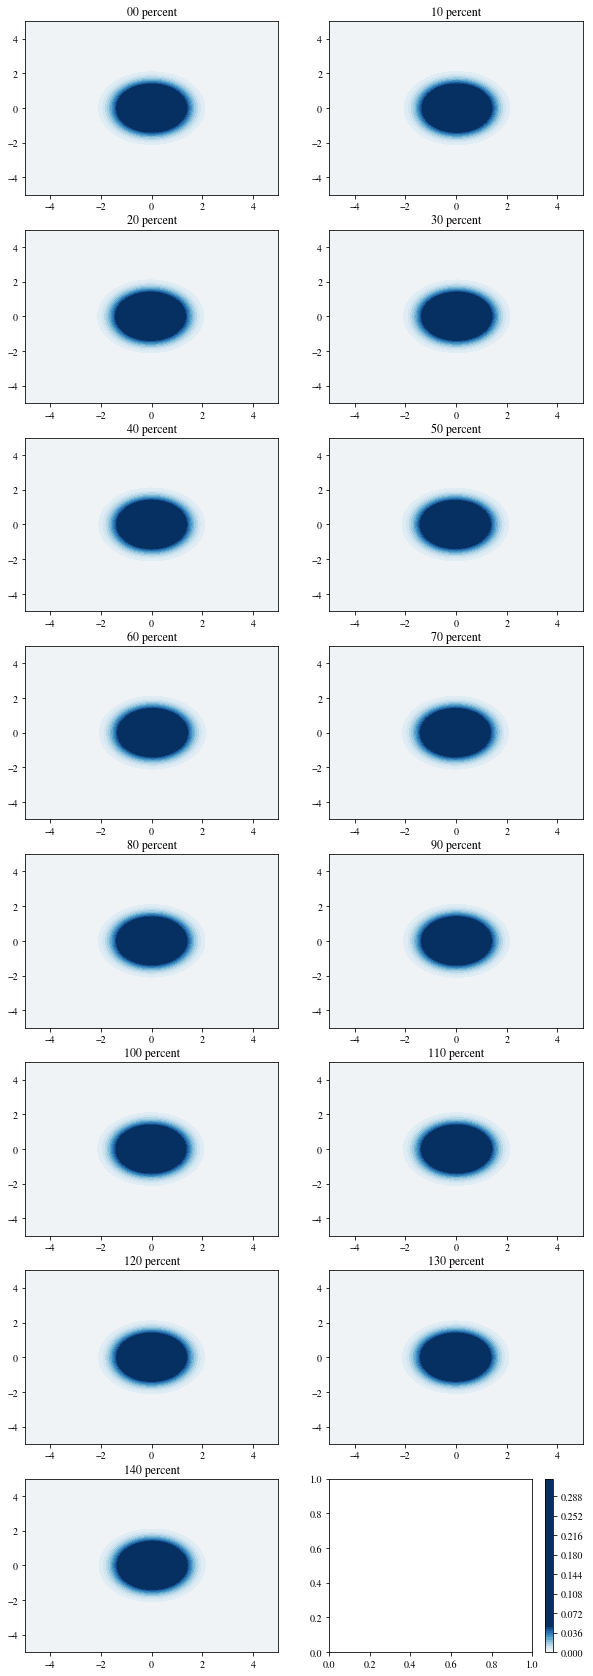

In [2]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(8, 2, figsize=(10,30))
for i in range(0,15):
    row = int((i)/2)
    col = (i)%2
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)

    array = np.loadtxt('./Data/JC+fb/New/Cdens0122_coherent_environment/%03d.txt'%(i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0141_coherent_cavity/%03d.txt'%(i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0005/%03d.txt'%(i)).view(complex)
    #print(array)
    print(Qobj(array).tr())
    correction = np.zeros((array.shape))
    correction[0][0] = 0#1
    W = wigner(Qobj(array-correction), xvec, xvec)
    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.05,.05),cmap="RdBu")
    lbl = axes[row][col].set_title("%d0 percent"%i)
cbar = fig.colorbar(cont)
    

In [11]:
dt = 0.05
for M in range(1000):

    if M*dt<10.1 and ((M+1)*dt)%1==0:
        print((M+1)*dt)
    elif M*dt>10. and ((M+1)*dt)%10==0:
        print((M+1)*dt)


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
20.0
30.0
40.0
50.0


In [1]:
array = np.loadtxt('./Data/JC+fb/New/Cdens0020_coherent_environment/%03d.txt'%(1)).view(complex)
#array = np.loadtxt('./Data/JC+fb/New/Cdens0041_coherent_cavity/%03d.txt'%(1)).view(complex)
#array = np.loadtxt('./Data/JC+fb/New/Cdens0013_coherent_environment/%03d.txt'%(2)).view(complex)
dist = np.diag(np.real(array))
#n, bins, patches=plt.hist(dist,len(dist))
plt.figure(1,dpi=500,figsize=(10,1.5))
plt.grid(True)
plt.bar(np.arange(len(dist)),dist)
plt.yscale("log")

NameError: name 'np' is not defined

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


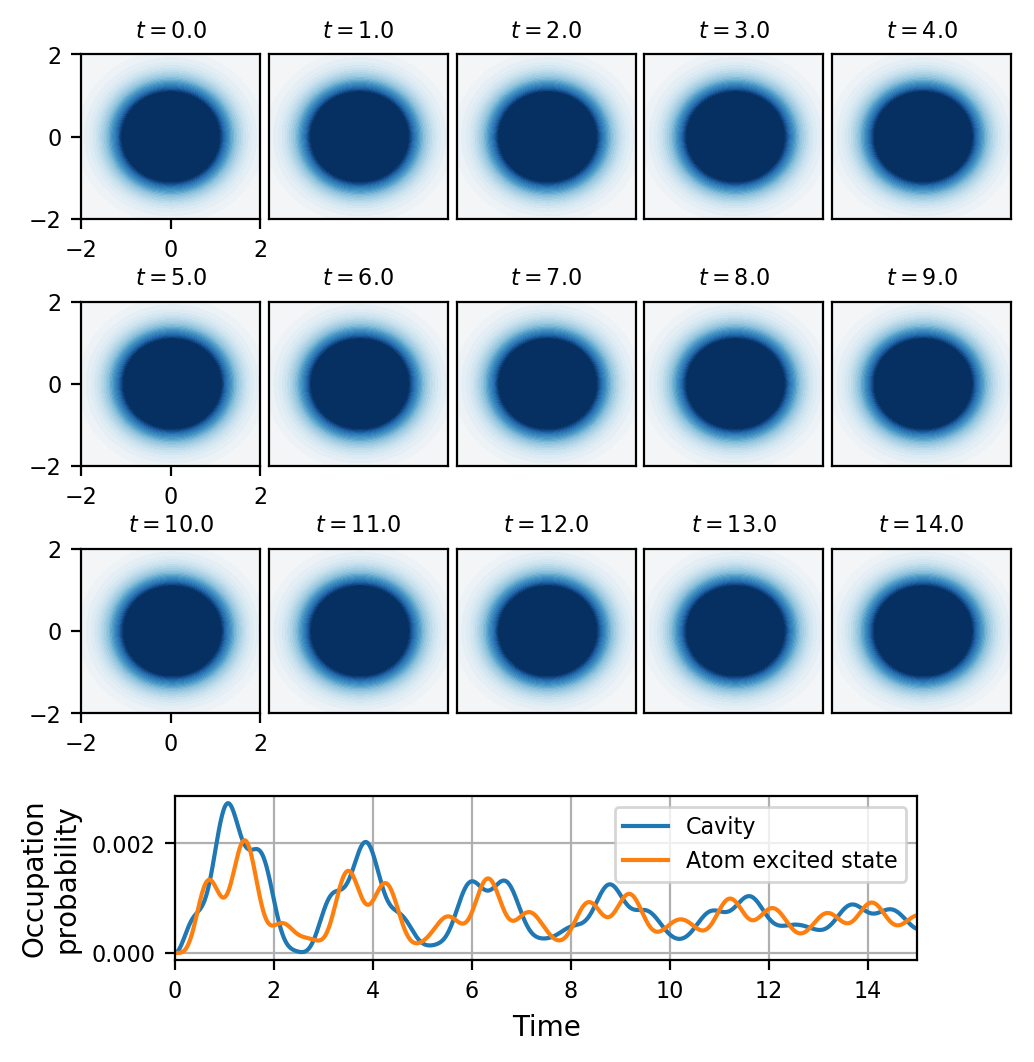

In [3]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def conv(x):
    return x.replace('+-', '-').encode()
mpl.rc('xtick',labelsize=8)
mpl.rc('ytick',labelsize=8)

xvec = np.linspace(-2,2,1000)
ID = 213
fig_grid = (4, 5*2)
fig = plt.figure(dpi=200,figsize=(6,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.1, hspace=0.5)
#fig, axes = plt.subplots(6, 2, figsize=(10,30))
for i in range(0,15):
    row = int(i/5)
    col = i%5
#    print(row,col)
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_cavity/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_environment/%03d.txt'%(ID,i)).view(complex)
    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_cavity_drive/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0010/%03d.txt'%(i)).view(complex)
    #print(array)
    W = wigner(Qobj(array), xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (row, 2*col), colspan=2)
    if col>0:
        ax.set_yticks([])
        ax.set_xticks([])
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.1,.1), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % (i), fontsize=8)
#    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.3,.3),cmap="RdBu")
#    lbl = axes[row][col].set_title("%d0 percent"%i)
dat1 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%(ID))),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%10)),dtype=complex)
#cbar = fig.colorbar(cont)
tlist = dat1[:,0]
n_c = dat1[:,4]
n_a = dat1[:,2]

ax = plt.subplot2grid(fig_grid, (3, 1), colspan=(fig_grid[1]-2))
ax.plot(tlist, n_c, label="Cavity")
ax.plot(tlist, n_a, label="Atom excited state")
ax.legend(loc="upper right",fontsize = 8)
ax.grid(True)
ax.set_xlim(0,15)
ax.set_xlabel('Time')
ax.set_ylabel('Occupation\nprobability');
plt.show()

In [45]:
print(expect(num(20),coherent_dm(20,3)))
#print(num(25))

8.998294013442164


FileNotFoundError: [Errno 2] No such file or directory: './Data/JC+fb/New/Bdens1005_cavity_drive/004.txt'

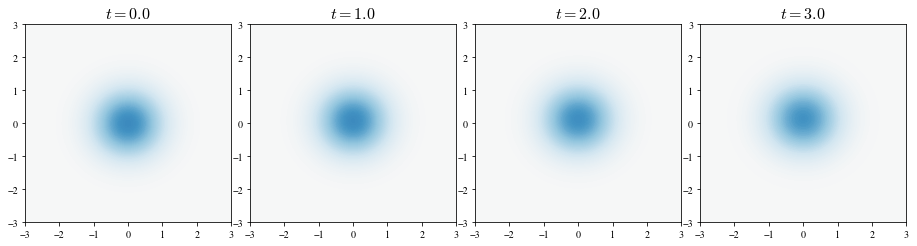

In [46]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def conv(x):
    return x.replace('+-', '-').encode()
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

xvec = np.linspace(-3,3,200)
ID=1005
fig_grid = (2, 20)
fig = plt.figure(figsize=(4*10,8))
#fig, axes = plt.subplots(6, 2, figsize=(10,30))
for i in range(0,10):
    row = int((i)/2)
    col = (i)%2
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)
    array = np.loadtxt('./Data/JC+fb/New/Bdens%04d_cavity_drive/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Bdens%04d_coherent_cavity/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Bdens%04d_coherent_environment/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Bdens0010/%03d.txt'%(i)).view(complex)
    #print(array)
    correction = np.zeros((array.shape))
    correction[0][0] = 0#1
    W = wigner(Qobj(array-correction), xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*i), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.5,.5), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % (i), fontsize=16)
#    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.3,.3),cmap="RdBu")
#    lbl = axes[row][col].set_title("%d0 percent"%i)
dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%8)),dtype=complex)
#cbar = fig.colorbar(cont)
tlist = dat1[:,0]
n_B = dat1[:,7]

ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(tlist[100:]-1, n_B[100:])
#ax.legend(loc="upper right")
ax.grid(True)
#ax.set_xlim(0,10)
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability');

In [38]:
print(expect(num(21),Qobj(array))/0.005)
#print(num(25))

5.620901637545915


In [11]:
N_env = 4
nBdiag = np.linspace(0,N_env,N_env+1).astype(np.int64)
nB = np.diag(nBdiag)
nB

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [3]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink',"orange",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

KeyboardInterrupt: 

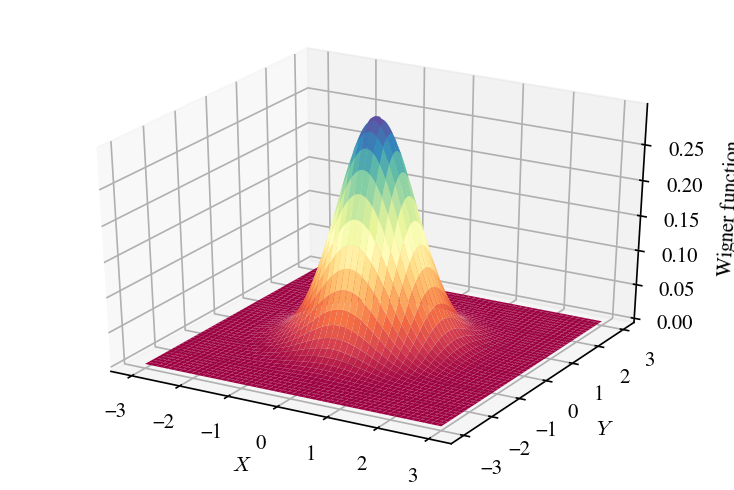

In [5]:
#% matplotlib inline
import numpy as np
from qutip import wigner,Qobj
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
import matplotlib.pyplot as plt
ID = 1
xvec = np.linspace(-3.,3.,200)
X,Y = np.meshgrid(xvec, xvec)
frn = 125
fps = 4
W = np.zeros((200,200,frn))

for i in range(1,frn+1):
    array = np.loadtxt('./Data/JC+fb/New/Bdens%04d/%02d.txt'%(ID,i)).view(complex)
    W[:,:,i-1] = wigner(Qobj(array), xvec, xvec)
#array = np.loadtxt('./Data/JC+fb/New/Bdens%04d/%02d.txt'%(ID,1)).view(complex)
#W= wigner(Qobj(array), xvec, xvec)

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], cmap="Spectral")

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, W[:,:,0], color='0.75',rstride=1, cstride=1, cmap="jet")]
ax.set_zlim(0,.3)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("Wigner function")

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(W, plot), interval=1/fps)
fn = './Data/JC+fb/New/Bdens%04d/anim'%ID
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
plt.rcParams['animation.html'] = 'html5'
ani